In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [6]:
connection = sqlite3.connect('../data/sakila.db')

df = pd.read_sql(
    '''
    SELECT
    
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id = customer.customer_id
    INNER JOIN inventory ON rental.inventory_id = inventory.inventory_id
    INNER JOIN store ON inventory.store_id = store.store_id
    INNER JOIN address ON store.address_id = address.address_id
    INNER JOIN city ON address.city_id = city.city_id
    INNER JOIN film ON inventory.film_id = film.film_id
    ;
    ''',
    connection, index_col='rental_id', parse_dates=['rental_date', 'return_date']
)

In [8]:
df.head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17
6,2005-05-24 23:08:07,2005-05-27 01:32:07,CHRISTENSON,1,Lethbridge,MYSTIC TRUMAN,5,0.99,19.99,NC-17
7,2005-05-24 23:11:53,2005-05-29 20:34:53,WALTERS,2,Woodridge,SWARM GOLD,4,0.99,12.99,PG-13
8,2005-05-24 23:31:46,2005-05-27 23:33:46,ROMERO,1,Lethbridge,LAWLESS VISION,6,4.99,29.99,G
9,2005-05-25 00:00:40,2005-05-28 00:22:40,SIMPSON,1,Lethbridge,MATRIX SNOWMAN,6,4.99,9.99,PG-13


In [10]:
df.shape

(16044, 10)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.3+ MB


In [12]:
df.isna().sum()

rental_date                0
return_date              183
customer_lastname          0
store_id                   0
rental_store_city          0
film_title                 0
film_rental_duration       0
film_rental_rate           0
film_replacement_cost      0
film_rating                0
dtype: int64

In [14]:
df.return_date

rental_id
1       2005-05-26 22:04:30
2       2005-05-28 19:40:33
3       2005-06-01 22:12:39
4       2005-06-03 01:43:41
5       2005-06-02 04:33:21
                ...        
16045   2005-08-25 23:54:26
16046   2005-08-27 18:02:47
16047   2005-08-25 02:48:48
16048   2005-08-31 21:33:07
16049   2005-08-30 01:01:12
Name: return_date, Length: 16044, dtype: datetime64[ns]

In [15]:
df.describe()

,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,16044.000000,16044.00000,16044.000000,16044.000000
mean,1.506171,4.93549,2.942630,20.215443
std,0.499978,1.40169,1.649678,6.081771
min,1.000000,3.00000,0.990000,9.990000
25%,1.000000,4.00000,0.990000,14.990000
50%,2.000000,5.00000,2.990000,20.990000
75%,2.000000,6.00000,4.990000,25.990000
max,2.000000,7.00000,4.990000,29.990000


In [16]:
'''Numerical analysis and visualizations'''

'Numerical analysis and visualizations'

In [17]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [18]:
df.columns

Index(['rental_date', 'return_date', 'customer_lastname', 'store_id',
       'rental_store_city', 'film_title', 'film_rental_duration',
       'film_rental_rate', 'film_replacement_cost', 'film_rating'],
      dtype='object')

In [19]:
df.film_rental_rate.describe()

count    16044.000000
mean         2.942630
std          1.649678
min          0.990000
25%          0.990000
50%          2.990000
75%          4.990000
max          4.990000
Name: film_rental_rate, dtype: float64

In [20]:
df.film_rental_rate.mean()

2.9426302667662574

In [21]:
df.film_rental_rate.median()

2.99

<AxesSubplot:>

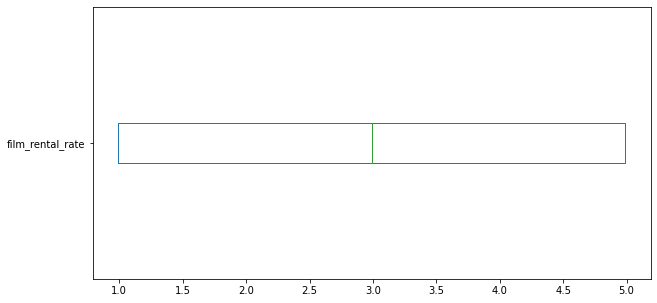

In [22]:
df.film_rental_rate.plot(kind='box', vert=False, figsize=(10, 5))

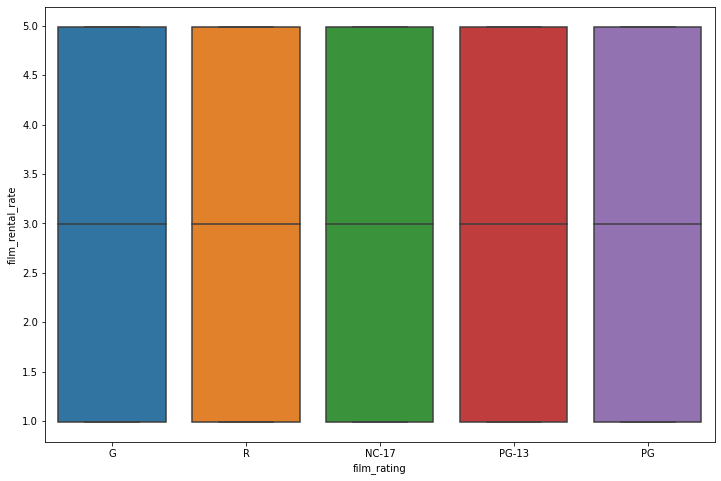

In [24]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='film_rating', y='film_rental_rate', data=df)
plt.show()

<AxesSubplot:ylabel='Density'>

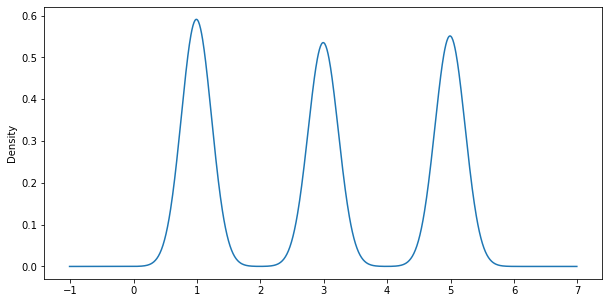

In [26]:
df.film_rental_rate.plot(kind='density', figsize=(10, 5))  #kde: kernel density estimation

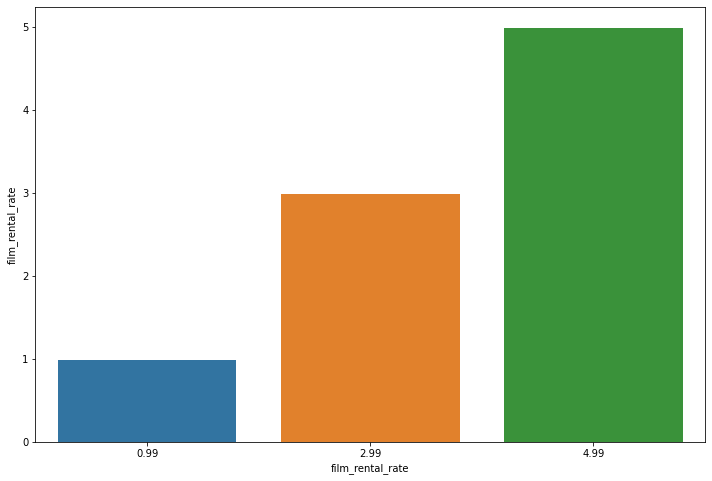

In [33]:
plt.figure(figsize=(12, 8))
sns.barplot(x='film_rental_rate', y='film_rental_rate', data=df)
plt.show()

In [34]:
'''Categorical analysis and visualizations'''

'Categorical analysis and visualizations'

In [35]:
df.rental_store_city.value_counts()

Woodridge     8121
Lethbridge    7923
Name: rental_store_city, dtype: int64

<AxesSubplot:ylabel='rental_store_city'>

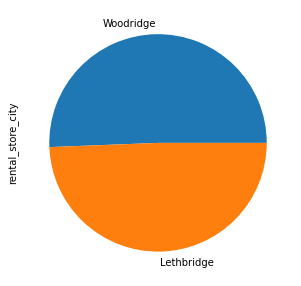

In [37]:
df.rental_store_city.value_counts().plot(kind='pie', figsize=(10, 5))

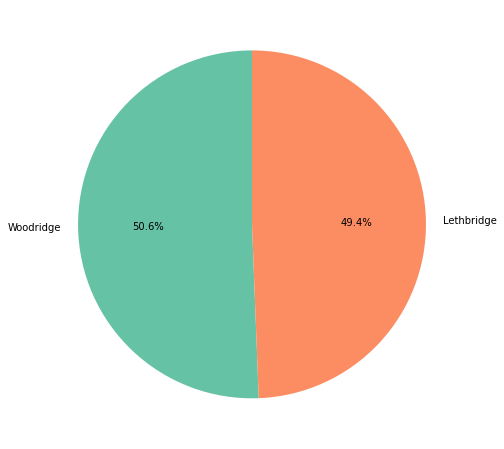

In [40]:
plt.figure(figsize=(12, 8))
colors = sns.color_palette('Set2', n_colors=4)
plt.pie(df.rental_store_city.value_counts(), 
        labels=df.rental_store_city.value_counts().index, 
        colors=colors, autopct='%1.1f%%', 
        startangle=90)
plt.show()

<AxesSubplot:ylabel='rental_store_city'>

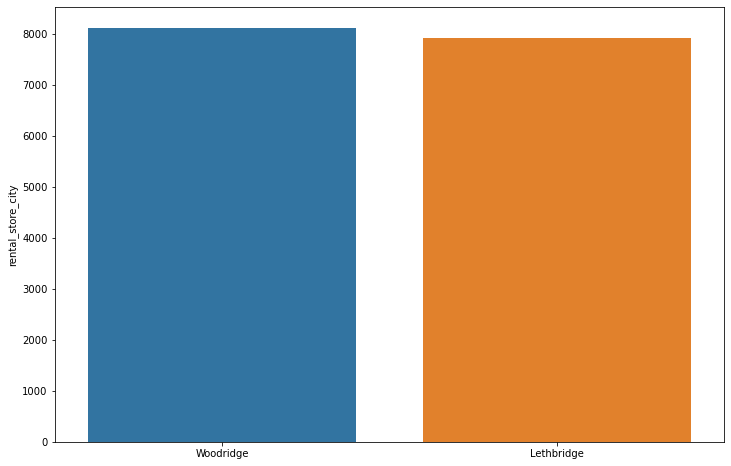

In [46]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df.rental_store_city.value_counts().index, y=df.rental_store_city.value_counts(), data=df)

In [53]:
'''Column Wrangling: add and calculate a new rental_rate_return'''

'Column Wrangling: add and calculate a new rental_rate_return'

In [54]:
# rental_rate_return = film_rental_rate / film_replacement_cost * 100
df.rental_rate_return = df.film_rental_rate / df.film_replacement_cost * 100

/var/folders/83/_gttb8hn67dfsswspxfpc23w0000gn/T/ipykernel_68995/3070049898.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.rental_rate_return = df.film_rental_rate / df.film_replacement_cost * 100


In [55]:
df.rental_rate_return.head()

rental_id
1    13.597090
2    17.598587
3    19.946631
4     4.502046
5     9.969990
dtype: float64

<AxesSubplot:ylabel='Density'>

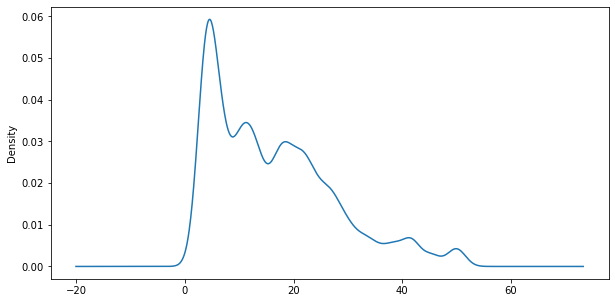

In [56]:
df.rental_rate_return.plot(kind='density', figsize=(10, 5))

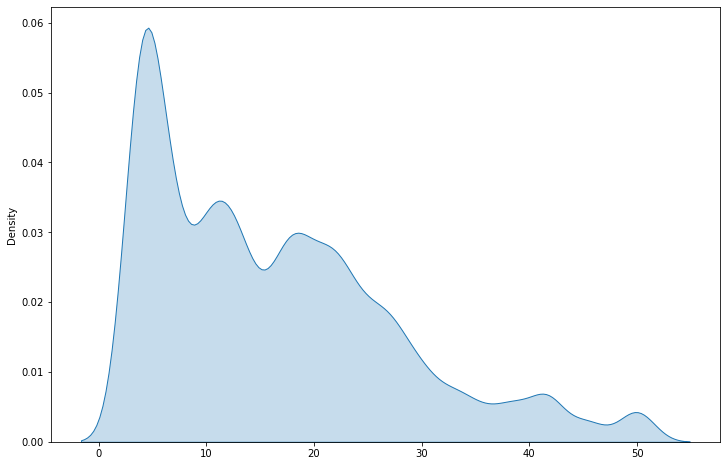

In [58]:
plt.figure(figsize=(12, 8))
sns.kdeplot(df.rental_rate_return, shade=True)
plt.show()

In [62]:
df.rental_rate_return.mean()

16.343824010240393

In [64]:
df.rental_rate_return.median()

13.597089586175537

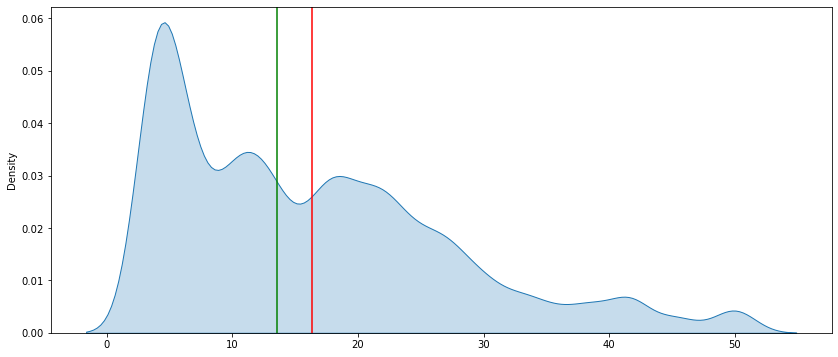

In [67]:
plt.figure(figsize=(14, 6))
ax = sns.kdeplot(df.rental_rate_return, shade=True)
ax.axvline(df.rental_rate_return.mean(), color='r')
ax.axvline(df.rental_rate_return.median(), color='g')
plt.show()

In [69]:
# each rental represents 13.6% of film cost so 7.35 rentals are needed to recover film market price
round(100 / 13.6, 2)

7.35

In [72]:
# on average, each film is rented 16.74 times
df.film_title.value_counts().mean()

16.747390396659707

In [73]:
'''Selection and Indexing'''

'Selection and Indexing'

In [75]:
# get the rental records of the customer with last name 'Smith'
df.loc[df.customer_lastname == 'Smith'.upper()]

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
76,2005-05-25 11:30:37,2005-06-03 12:00:37,SMITH,2,Woodridge,PATIENT SISTER,7,0.99,29.99,NC-17
573,2005-05-28 10:35:23,2005-06-03 06:32:23,SMITH,2,Woodridge,TALENTED HOMICIDE,6,0.99,9.99,PG
1185,2005-06-15 00:54:12,2005-06-23 02:42:12,SMITH,1,Lethbridge,MUSKETEERS WAIT,7,4.99,17.99,PG
1422,2005-06-15 18:02:53,2005-06-19 15:54:53,SMITH,2,Woodridge,DETECTIVE VISION,4,0.99,16.99,PG-13
1476,2005-06-15 21:08:46,2005-06-25 02:26:46,SMITH,1,Lethbridge,FERRIS MOTHER,3,2.99,13.99,PG
1725,2005-06-16 15:18:57,2005-06-17 21:05:57,SMITH,1,Lethbridge,CLOSER BANG,5,4.99,12.99,R
2308,2005-06-18 08:41:48,2005-06-22 03:36:48,SMITH,1,Lethbridge,ATTACKS HATE,5,4.99,21.99,PG-13
2363,2005-06-18 13:33:59,2005-06-19 17:40:59,SMITH,1,Lethbridge,SAVANNAH TOWN,5,0.99,25.99,PG-13
3284,2005-06-21 06:24:45,2005-06-28 03:28:45,SMITH,1,Lethbridge,YOUTH KICK,4,0.99,14.99,NC-17


In [76]:
len(df.loc[df.customer_lastname == 'Smith'.upper()])

32

In [77]:
# create a list of all the films with the highest replacement cost
df.film_replacement_cost.max()

29.99

In [78]:
df.loc[df.film_replacement_cost == df.film_replacement_cost.max(), 'film_title'].unique()

array(['IDOLS SNATCHERS', 'LAWLESS VISION', 'SONG HEDWIG',
       'LOATHING LEGALLY', 'PATIENT SISTER', 'RESERVOIR ADAPTATION',
       'JEEPERS WEDDING', 'GOLDFINGER SENSIBILITY', 'CHARIOTS CONSPIRACY',
       'HONEY TIES', 'GRAFFITI LOVE', 'SLACKER LIAISONS', 'DIRTY ACE',
       'BLINDNESS GUN', 'WYOMING STORM', 'FEUD FROGMEN', 'SALUTE APOLLO',
       'JINGLE SAGEBRUSH', 'HILLS NEIGHBORS', 'UNCUT SUICIDES',
       'EVERYONE CRAFT', 'FLATLINERS KILLER', 'BALLROOM MOCKINGBIRD',
       'RIVER OUTLAW', 'ARABIA DOGMA', 'VIRGIN DAISY', 'JERICHO MULAN',
       'SASSY PACKER', 'TRACY CIDER', 'LOVER TRUMAN', 'DOCTOR GRAIL',
       'GILMORE BOILED', 'PRINCESS GIANT', 'CRUELTY UNFORGIVEN',
       'REIGN GENTLEMEN', 'WEST LION', 'BONNIE HOLOCAUST', 'EARTH VISION',
       'RANDOM GO', 'CLOCKWORK PARADISE', 'FANTASIA PARK', 'RIGHT CRANES',
       'CUPBOARD SINNERS', 'OSCAR GOLD', 'SMILE EARRING',
       'HOLLYWOOD ANONYMOUS', 'POSEIDON FOREVER',
       'EXTRAORDINARY CONQUERER', 'QUEST MUSSOLINI', 

In [80]:
# how many PG or PG-13 rating films were rented?
pg_13 = df.loc[(df.film_rating == 'PG') | (df.film_rating == 'PG-13')].shape[0]
print(f'{pg_13} films were rated PG or PG-13')

6797 films were rated PG or PG-13
